# PCA through Singular Value Decomposition

In [2]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R = np.cov(X)

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the coordinates in new orthonormal basis:
Xi = U.T @ X  # Project X onto new basis (both components)
Xi1 = u1.T @ X  # Coordinates along first principal component only

# Calculate the approximation of the original from new basis
X_approx_1d = u1[:,None] @ Xi1[None,:]  # 1D approximation (first PC only)
X_approx_full = U @ Xi  # Full reconstruction using both PCs

# Check that you got the original
print("Original X:")
print(X)
print("\nCovariance matrix R:")
print(R)
print("\nCoordinates in new basis (both PCs):")
print(Xi)
print("\nCoordinates along first PC only:")
print(Xi1)
print("\n1D Approximation (first PC only):")
print(X_approx_1d)
print("\nFull reconstruction (both PCs):")
print(X_approx_full)
print("\nDifference (should be ~0 for full reconstruction):")
print(X - X_approx_full)

Original X:
[[2 1 0]
 [4 3 0]]

Covariance matrix R:
[[1.         2.        ]
 [2.         4.33333333]]

Coordinates in new basis (both PCs):
[[-4.47066848 -3.14092366  0.        ]
 [-0.11455726  0.36687677  0.        ]]

Coordinates along first PC only:
[-4.47066848 -3.14092366  0.        ]

1D Approximation (first PC only):
[[1.89625816 1.33223972 0.        ]
 [4.04859008 2.84438724 0.        ]]

Full reconstruction (both PCs):
[[2. 1. 0.]
 [4. 3. 0.]]

Difference (should be ~0 for full reconstruction):
[[ 4.44089210e-16  5.55111512e-16  0.00000000e+00]
 [-8.88178420e-16 -4.44089210e-16  0.00000000e+00]]


# PCA on Iris data

In [3]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

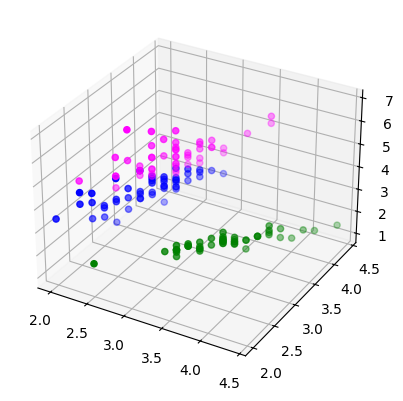

In [4]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<function matplotlib.pyplot.show(close=None, block=None)>

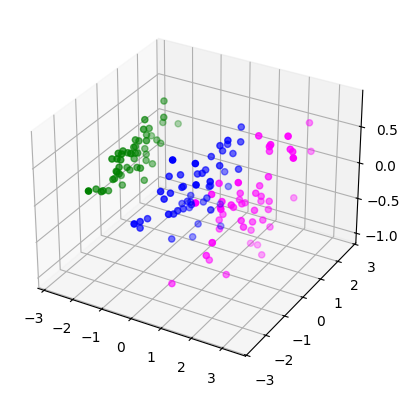

In [5]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show


In [6]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [7]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

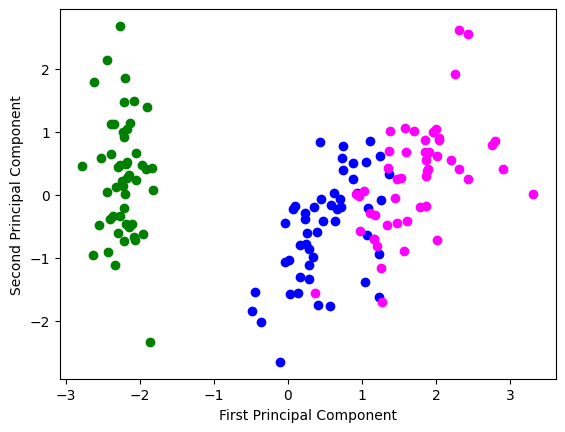

In [8]:
# Plot the principal components in 2D, mark different targets in color
plt.figure()
plt.scatter(Xpca[y==0,0],Xpca[y==0,1],color='green')
plt.scatter(Xpca[y==1,0],Xpca[y==1,1],color='blue')
plt.scatter(Xpca[y==2,0],Xpca[y==2,1],color='magenta')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


# KNN classifier

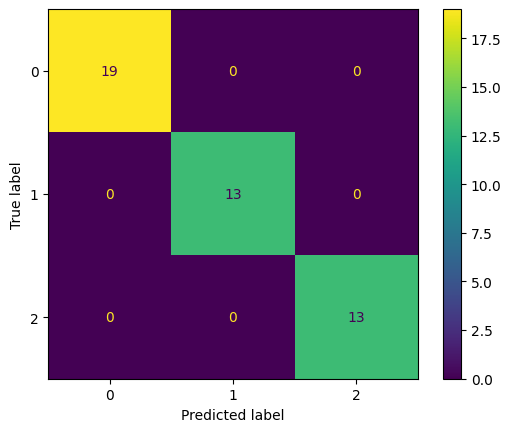

In [9]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test,Ypred)
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)


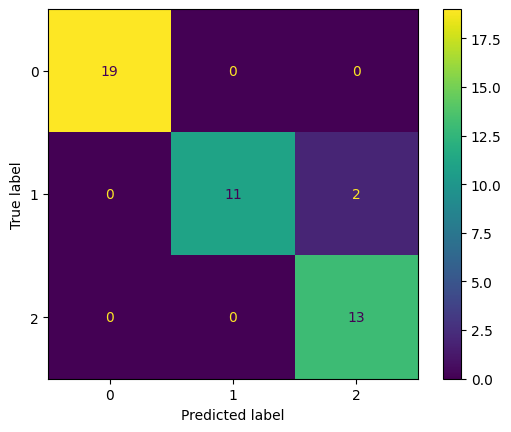

In [10]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns). 
# Compare the results with full dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xpca[:,:2], y, test_size=0.3, random_state=42)
knn2=KNeighborsClassifier(n_neighbors = 3)
knn2.fit(X_train2,y_train2)
Ypred2=knn2.predict(X_test2)
confusion_matrix(y_test2,Ypred2)
ConfusionMatrixDisplay.from_predictions(y_test2,Ypred2)


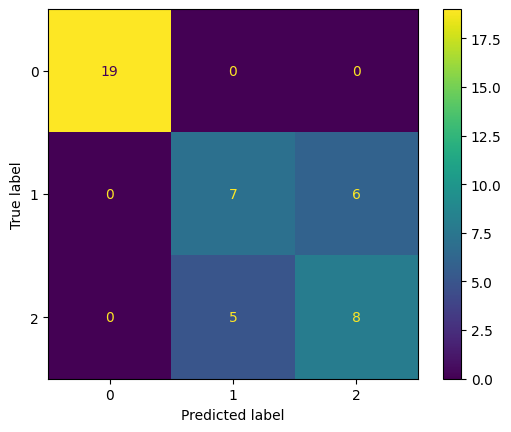

In [11]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X[:,:2], y, test_size=0.3, random_state=42)
knn3=KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train3,y_train3)
Ypred3=knn3.predict(X_test3)
confusion_matrix(y_test3,Ypred3)
ConfusionMatrixDisplay.from_predictions(y_test3,Ypred3)
